# Benefit of MPL System Modelling

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

In [2]:
S_True = sys_from_file('True System')
# system_display_matrix(S_True)
initial_values = initial_values_init(S_True, T=50)

System read from file @ system_model/True System.pickle 

Generating random sample of initial state from given distribution for simulation


## Control of True System based on Nominal System model

##### Run Code

In [3]:
S_Nominal = sys_from_file('Nominal System')

System read from file @ system_model/Nominal System.pickle 



In [4]:
ret1_nom = actuator_selection_cost_1(S_Nominal, initial_values=initial_values)
S_Nominal = dc(ret1_nom['system'])
# system_display_matrix(S_Nominal)
S_True['B'] = dc(S_Nominal['B'])
ret2_nom = simulation_actuator_selection(S_Nominal, S_True, initial_values=initial_values)

Gain (K):
 [[-0.28652981 -0.38821196 -0.27528425 -0.27029503 -0.2340792  -0.19255048
  -0.1364626  -0.07099628]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.25947307 -0.31707511 -0.14497131 -0.08655069 -0.02624609  0.00345486
   0.01044783  0.00774526]
 [-0.02437868 -0.07453208 -0.12925524 -0.32140419 -0.33284031 -0.32877835
  -0.13907473 -0.07748521]
 [ 0.          0.      

##### Display Output

In [5]:
print('Cost change with |S|:\n')
for i in ret2_nom['costs']:
    print('|S|:',i, ' => ', ret2_nom['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  68.14311198011433
|S|: 2  =>  54.80990155307961
|S|: 3  =>  54.02254876730906
|S|: 4  =>  45.98476478955235
|S|: 5  =>  45.86109252470952
|S|: 6  =>  45.28560220521934
|S|: 7  =>  43.80962045580748
|S|: 8  =>  43.21392630880623


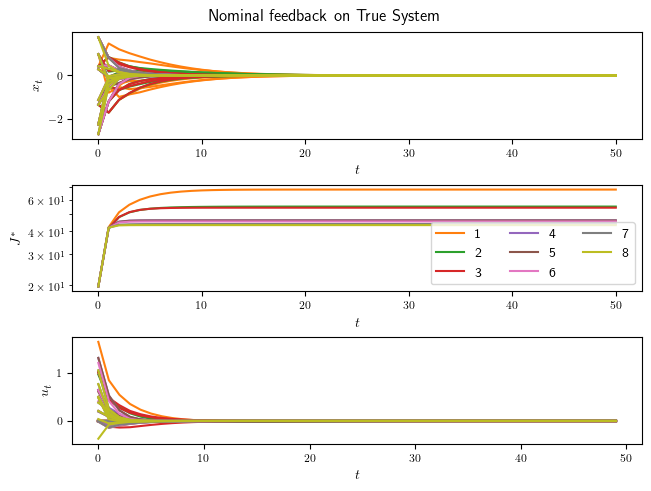

In [6]:
plot_simulation(display_data=ret2_nom, fname='Nominal feedback on True System')

## Control of True System based on MPL System model

##### Run Code

In [7]:
S_MPL = sys_from_file('MPL System')

System read from file @ system_model/MPL System.pickle 



In [8]:
ret1_MPL = actuator_selection_cost_1(S_MPL, initial_values=initial_values)
S_MPL = dc(ret1_MPL['system'])
# system_display_matrix(S_MPL)
S_True['B'] = dc(S_MPL['B'])
ret2_MPL = simulation_actuator_selection(S_MPL, S_True, initial_values=initial_values)

Gain (K):
 [[-0.28652981 -0.38821196 -0.27528425 -0.27029503 -0.2340792  -0.19255048
  -0.1364626  -0.07099628]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.25947307 -0.31707511 -0.14497131 -0.08655069 -0.02624609  0.00345486
   0.01044783  0.00774526]
 [-0.02437868 -0.07453208 -0.12925524 -0.32140419 -0.33284031 -0.32877835
  -0.13907473 -0.07748521]
 [ 0.          0.      

##### Display Output

In [9]:
print('Cost change with |S|:\n')
for i in ret2_MPL['costs']:
    print('|S|:',i, ' => ', ret2_MPL['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  68.14311198011433
|S|: 2  =>  54.80990155307961
|S|: 3  =>  54.02254876730906
|S|: 4  =>  45.98476478955235
|S|: 5  =>  45.86109252470952
|S|: 6  =>  45.28560220521934
|S|: 7  =>  43.80962045580748
|S|: 8  =>  43.21392630880623


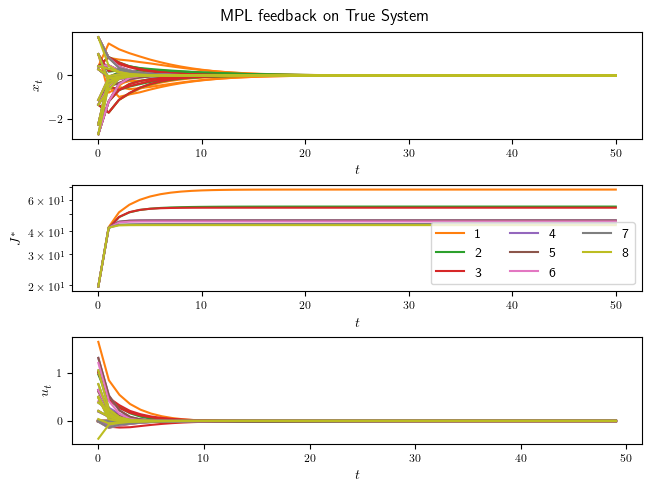

In [10]:
plot_simulation(display_data=ret2_MPL, fname='MPL feedback on True System')

## Self-Control Tests

### Testing Nominal control on itself

##### Run Code

In [11]:
ret3_nom = simulation_actuator_selection(S_Nominal, S_Nominal)

Generating random sample of initial state from given distribution for simulation
Gain (K):
 [[-0.28700827 -0.38944262 -0.27749069 -0.27329846 -0.23749239 -0.19583267
  -0.13904896 -0.07242068]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.25947307 -0.31707511 -0.14497131 -0.08655069 -0.02624609  0.00345486
   0.01044783  0.00774526]
 [-0.02437868 -0.07453208 -0.12925524 -0.32

##### Display Output

In [12]:
# plot_actuator_selection_1(S_Nominal['B'], ret1_nom['cost_trend'], ret1_nom['time_trend'], ret1_nom['check_trend'], fname='Nominal Actuator Selection')

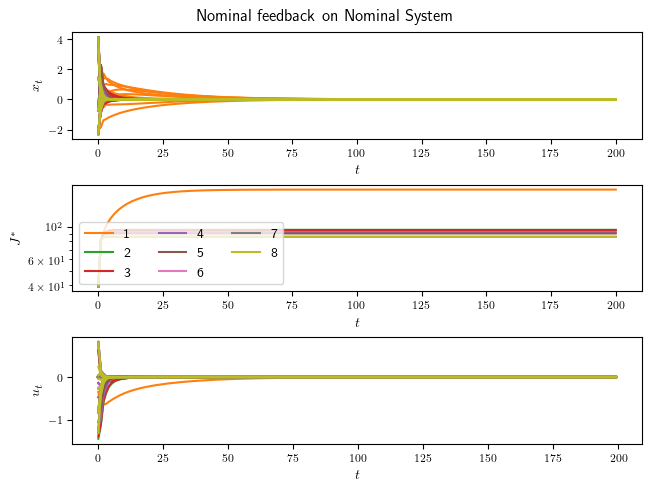

|S|: 1  =>  178.97180432862493
|S|: 2  =>  95.40998886246744
|S|: 3  =>  95.06070814887488
|S|: 4  =>  92.05955829427008
|S|: 5  =>  90.15184414714156
|S|: 6  =>  85.49497781113811
|S|: 7  =>  85.46176553509798
|S|: 8  =>  85.32032711069904


In [13]:
plot_simulation(display_data=ret3_nom, fname='Nominal feedback on Nominal System')
for i in ret3_nom['costs']:
    print('|S|:',i, ' => ', ret3_nom['costs'][i][-1])

### Testing MPL control on itself

##### Run Code

In [14]:
ret3_MPL = simulation_actuator_selection(S_MPL, S_MPL)

Generating random sample of initial state from given distribution for simulation
Gain (K):
 [[-0.28700827 -0.38944262 -0.27749069 -0.27329846 -0.23749239 -0.19583267
  -0.13904896 -0.07242068]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
====> Breaking current simulation at t= 45  as cumulative cost magnitude exceed 10^(10)
Gain (K):
 [[-0.25947307 -0.31707511 -0.14497131 -0.08655069 -0.026

##### Display Output

In [15]:
# plot_actuator_selection_1(S_MPL['B'], ret1_MPL['cost_trend'], ret1_MPL['time_trend'], ret1_MPL['check_trend'], fname='MPL Actuator Selection')

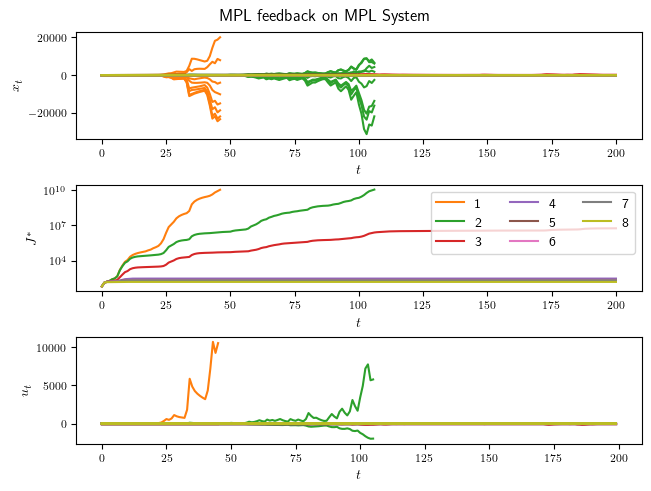

|S|: 1  =>  nan
|S|: 2  =>  nan
|S|: 3  =>  5496827.742045319
|S|: 4  =>  289.73817725671444
|S|: 5  =>  222.88451838501751
|S|: 6  =>  201.80367096747116
|S|: 7  =>  205.36936718055404
|S|: 8  =>  150.96908823861273


In [16]:
plot_simulation(display_data=ret3_MPL, fname='MPL feedback on MPL System')
for i in ret3_MPL['costs']:
    print('|S|:',i, ' => ', ret3_MPL['costs'][i][-1])